#### Loading libaries and datasets

In [1]:
conda install seaborn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [6]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Does average amount of tip differ by gender?

In [56]:
avg_tip = tips_df.groupby('sex')['tip'].mean().reset_index(name='Avg_tip')
avg_tip

,sex,Avg_tip
0,Male,3.089618
1,Female,2.833448


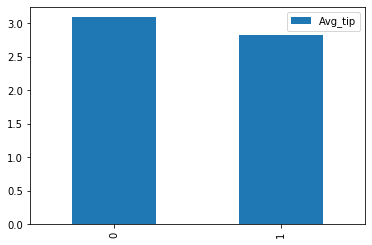

In [58]:
avg_tip.plot(kind='bar')

#### Overall distribution of amounts of tips

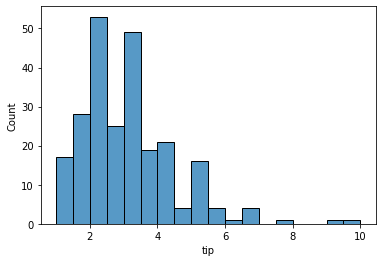

In [35]:
sns.histplot(tips_df['tip'])

#### Amount of tip relative to bill size

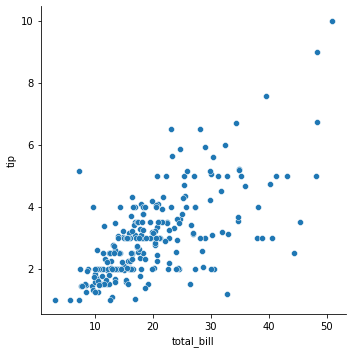

In [11]:
sns.relplot(data=tips_df, x="total_bill", y="tip")

#### Any differences in the amount tipped based on the day?

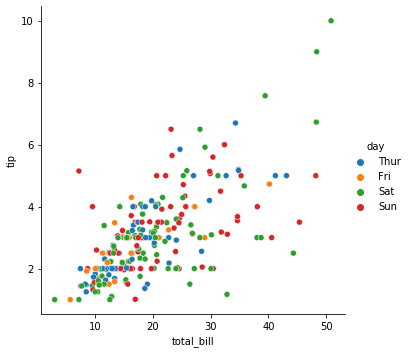

In [12]:
sns.relplot(data=tips_df, x="total_bill", y="tip", hue="day")

####  Comparing amount tipped each day by gender - single column view

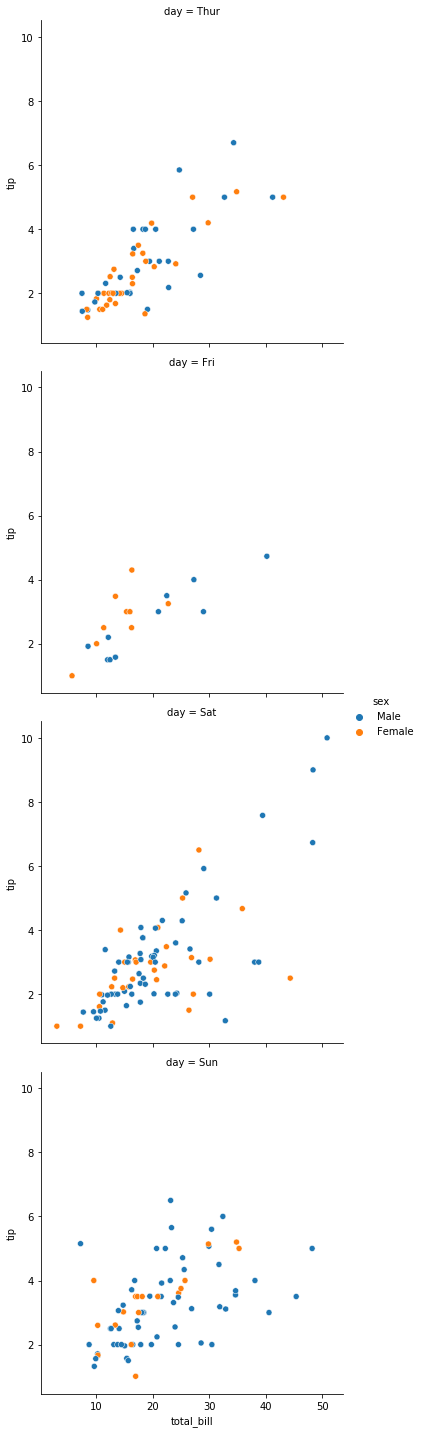

In [20]:
sns.relplot(data=tips_df, x="total_bill", y="tip", hue="sex", col="day", col_wrap=1)

####  Comparing amount tipped each day,by gender - two column view

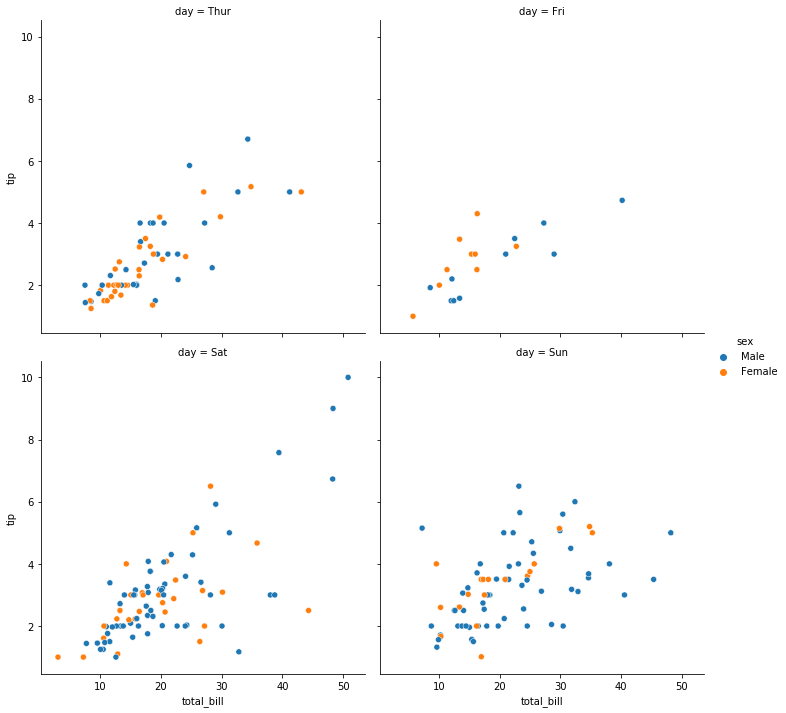

In [19]:
sns.relplot(data=tips_df, x="total_bill", y="tip", hue="sex", col="day", col_wrap=2)

#### Do smokers tip more at certain times of the day?

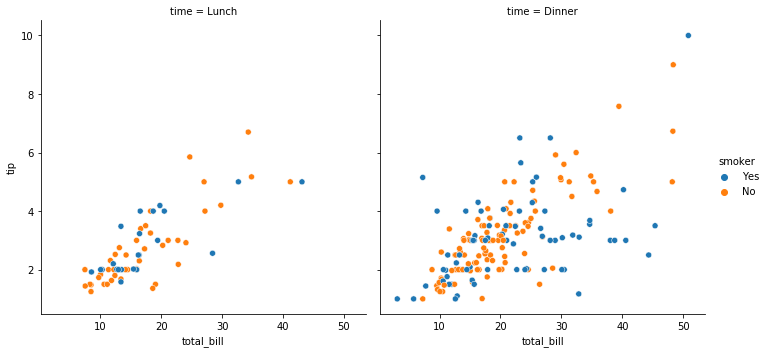

In [22]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips_df)

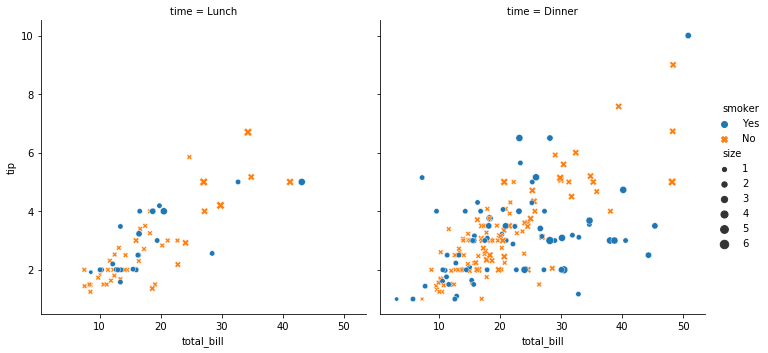

In [37]:
# Amount tipped relative to total bill, by time of day - adding size

sns.relplot(
    data=tips_df,
    x='total_bill', y='tip', col='time',
    hue='smoker', style='smoker', size='size')

#### Plotting cost of meal (total bill) by gender - all days combined

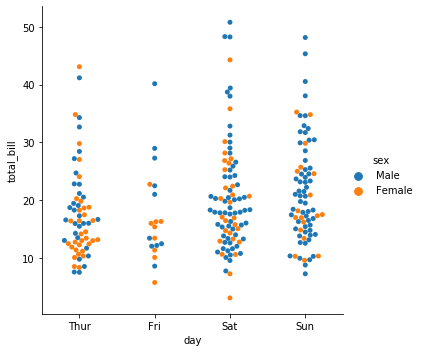

In [60]:
sns.catplot(data=tips_df, kind="swarm", x="day", y="total_bill", hue="sex")

#### Plotting amount of tip by gender - all days combined

/Users/johnstonkirimo/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


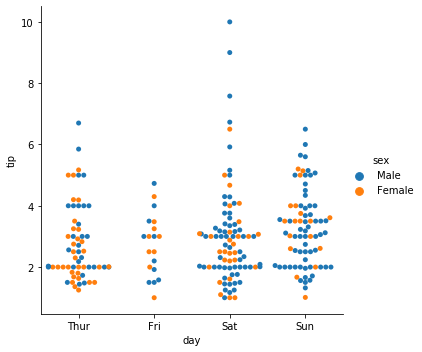

In [61]:
sns.catplot(data=tips_df, kind="swarm", x="day", y="tip", hue="sex")

#### Same view as above, here shown by smoker

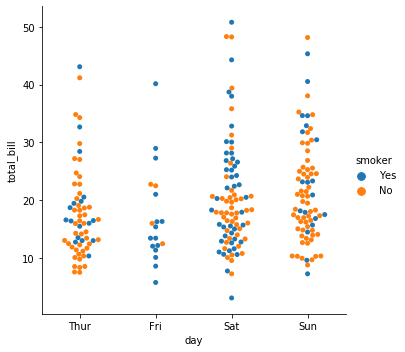

In [64]:
sns.catplot(data=tips_df, kind="swarm", x="day", y="total_bill", hue="smoker")

#### Plotting relative changes in x-y variables over time

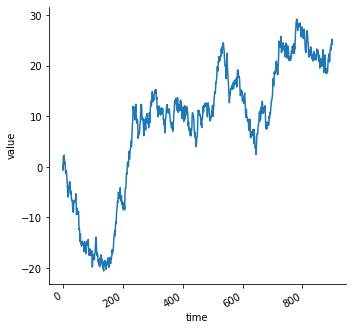

In [50]:
df = pd.DataFrame(dict(time=np.arange(900),
                       value=np.random.randn(900).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.figure.autofmt_xdate()

### Looking at car crashes

In [65]:
crashes_df = sns.load_dataset('car_crashes')
crashes_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


#### Let's plot the distribution of car crashes when driver had used alcohol

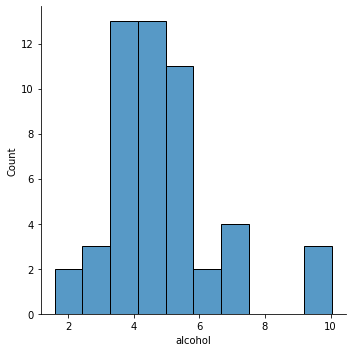

In [70]:
sns.displot(crashes_df['alcohol'])

#### Now let's use kde

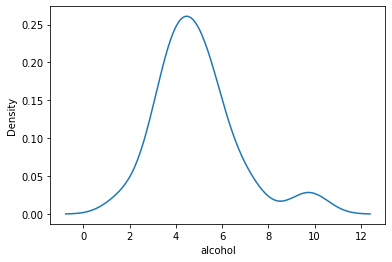

In [67]:
sns.kdeplot(crashes_df['alcohol'])

#### How about when driver was not distracted?

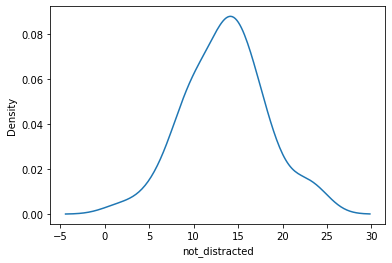

In [74]:
sns.kdeplot(crashes_df['not_distracted'])

#### Let's visualize the relationship between speeding and other factors

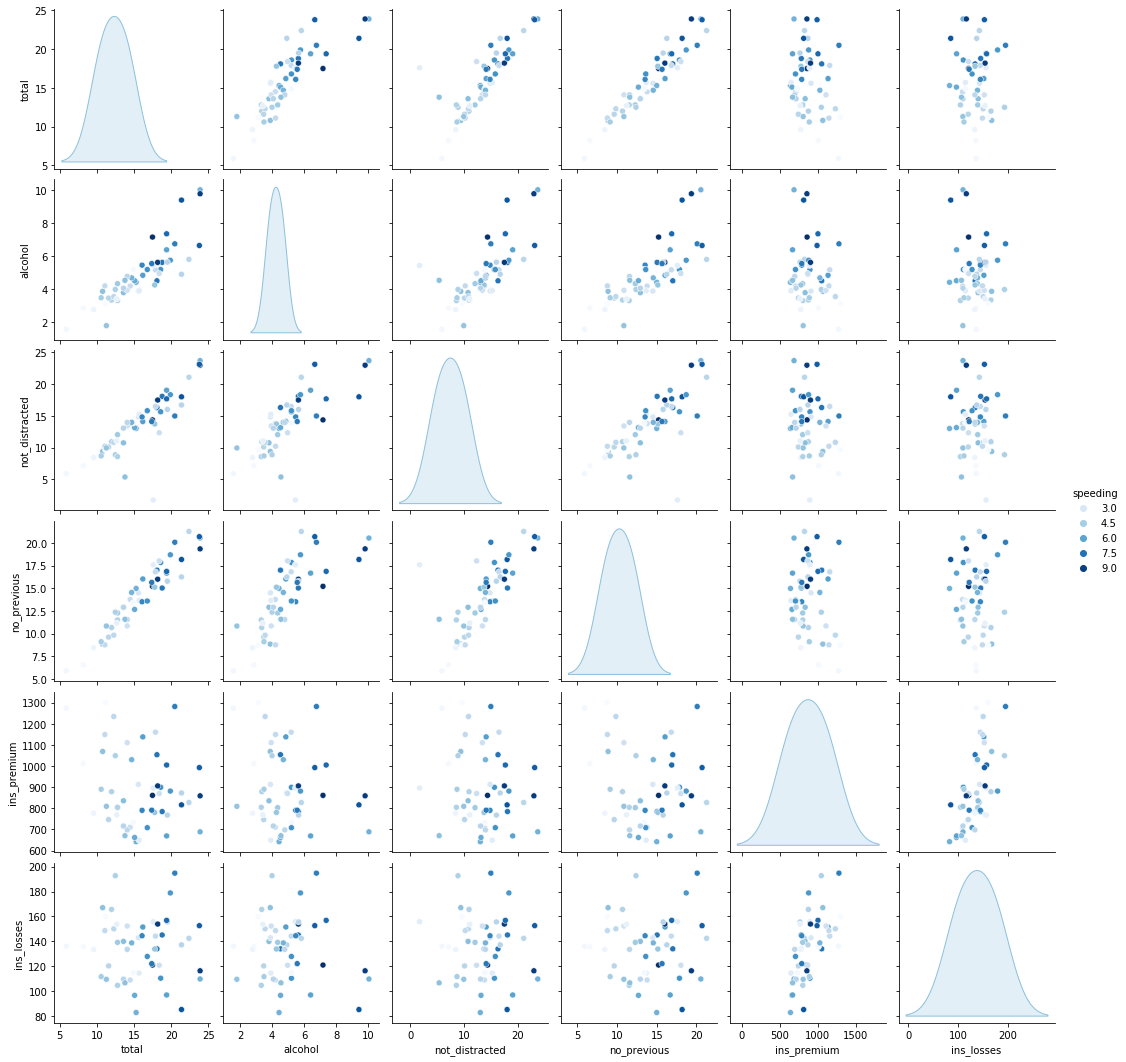

In [76]:
sns.pairplot(crashes_df, hue='speeding', palette='Blues')

#### How does it look when driver was speeding and also consumed alcohol?

<Figure size 720x720 with 0 Axes>

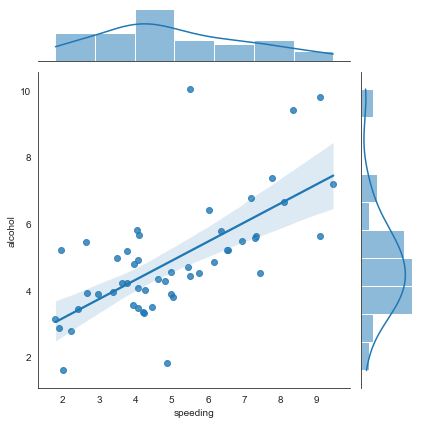

In [78]:
sns.set_style('white') # other options: dark, white, whitegrid, ticks, darkgrid

plt.figure(figsize=(10,10))
sns.jointplot(x='speeding', y='alcohol', data=crashes_df, kind='reg')

#### Effect of alcohol use on speeding vs distracted driving

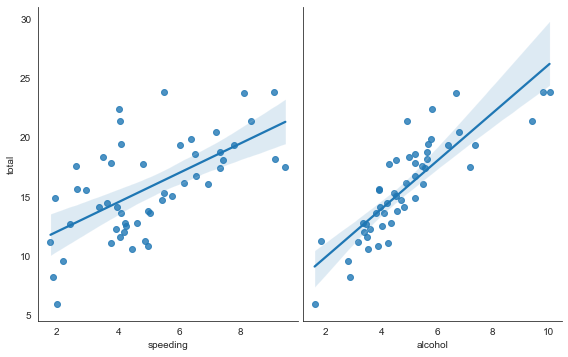

In [81]:
sns.pairplot(crashes_df, x_vars=["speeding", "alcohol"], y_vars=["total"],
              height=5, aspect=.8, kind="reg");

#### Do drivers in certain states have higher tendencies to speed and drink more?

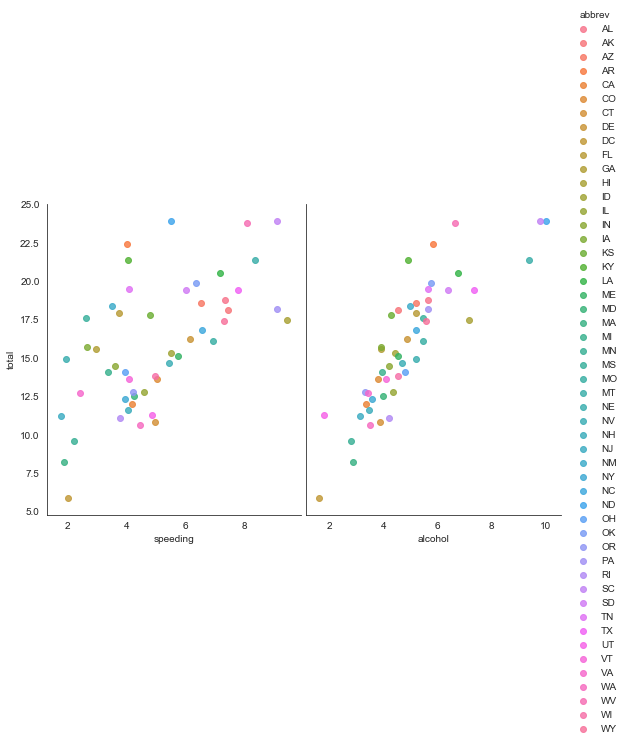

In [83]:
sns.pairplot(crashes_df, x_vars=["speeding", "alcohol"], y_vars=["total"],
              hue='abbrev', height=5, aspect=.8, kind="reg");